In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
%matplotlib inline

In [41]:
#read excel files - some have more than one sheet
path = r'D:\OneDrive - mail.tau.ac.il\Romania training\data'

path5 = r'5fL_15ms.xlsx'
path100 = r'100fL_15ms.xlsx'
path1000 = r'1000fL_15ms.xlsx'
path10000 = r'10000fL_15ms.xlsx'
path_dark = 'Dark15ms.xlsx'
path_dark_end = 'Dark15ms-end.xlsx'
path_sphere = 'DataExample_RadCal.xls'

data5 = pd.read_excel(os.path.join(path,path5))
data100 = pd.read_excel(os.path.join(path,path100))     
data1000 = pd.read_excel(os.path.join(path,path1000))
data10000 = pd.read_excel(os.path.join(path,path10000))
data_dark = pd.read_excel(os.path.join(path,path_dark))
data_dark_end = pd.read_excel(os.path.join(path,path_dark_end))
sphere = pd.read_excel(os.path.join(path,path_sphere), sheet_name = 'StandardRadianceExample-4levels').iloc[1:,:]
sphere_u = pd.read_excel(os.path.join(path,path_sphere), sheet_name = r'StandardUncertainties')

# First assignment by Luara

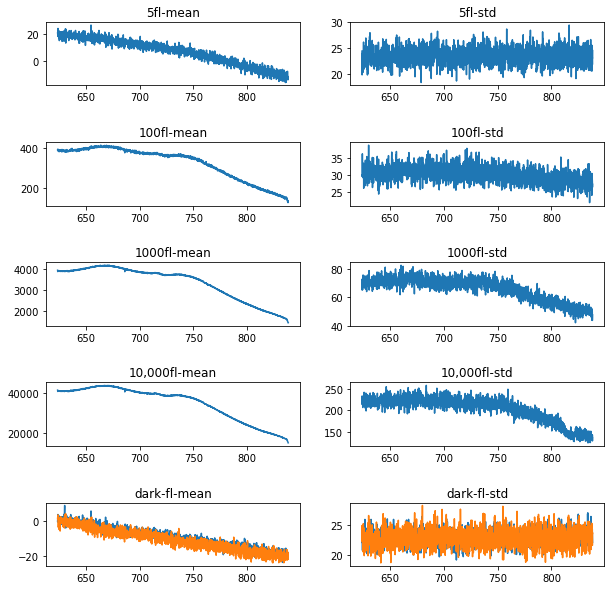

In [43]:
#plot the data - it is possible to compare the 2 dark files
wavelengths = sphere['Wavelength (nm)']
fig, axs = plt.subplots(5, 2,figsize=(10,10))
axs[0,0].plot(wavelengths,data5.iloc[4:,1:].mean(axis=1))
axs[0, 0].set_title('5fl-mean')
axs[0,1].plot(wavelengths,data5.iloc[4:,1:].std(axis=1))
axs[0, 1].set_title('5fl-std')

axs[1,0].plot(wavelengths,data100.iloc[4:,1:].mean(axis=1))
axs[1, 0].set_title('100fl-mean')
axs[1,1].plot(wavelengths,data100.iloc[4:,1:].std(axis=1))
axs[1, 1].set_title('100fl-std')

axs[2,0].plot(wavelengths,data1000.iloc[4:,1:].mean(axis=1))
axs[2, 0].set_title('1000fl-mean')
axs[2,1].plot(wavelengths,data1000.iloc[4:,1:].std(axis=1))
axs[2,1].set_title('1000fl-std')

axs[3,0].plot(wavelengths,data10000.iloc[4:,1:].mean(axis=1))
axs[3, 0].set_title('10,000fl-mean')
axs[3,1].plot(wavelengths,data10000.iloc[4:,1:].std(axis=1))
axs[3, 1].set_title('10,000fl-std')

axs[4,0].plot(wavelengths,data_dark.iloc[4:,1:].mean(axis=1))
axs[4,0].plot(wavelengths,data_dark_end.iloc[4:,1:].mean(axis=1))
axs[4, 0].set_title('dark-fl-mean')
axs[4,1].plot(wavelengths,data_dark.iloc[4:,1:].std(axis=1))
axs[4,1].plot(wavelengths,data_dark_end.iloc[4:,1:].std(axis=1))
axs[4, 1].set_title('dark-fl-std')

fig.subplots_adjust(hspace = 0.9)

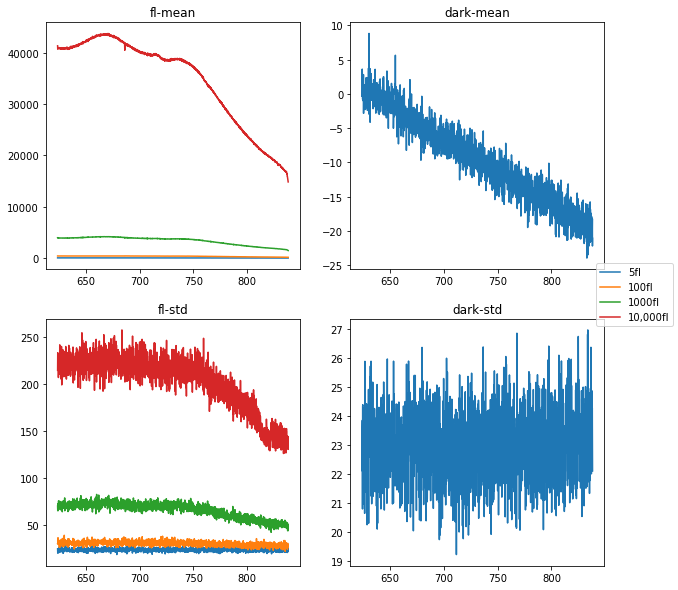

In [44]:
#more plotting
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].plot(wavelengths,data5.iloc[4:,1:].mean(axis=1), label='5fl')
axs[0,0].plot(wavelengths,data100.iloc[4:,1:].mean(axis=1), label='100fl')
axs[0,0].plot(wavelengths,data1000.iloc[4:,1:].mean(axis=1), label='1000fl')
axs[0,0].plot(wavelengths,data10000.iloc[4:,1:].mean(axis=1), label='10,000fl')
axs[0, 0].set_title('fl-mean')
axs[1,0].plot(wavelengths,data5.iloc[4:,1:].std(axis=1))
axs[1,0].plot(wavelengths,data100.iloc[4:,1:].std(axis=1))
axs[1,0].plot(wavelengths,data1000.iloc[4:,1:].std(axis=1))
axs[1,0].plot(wavelengths,data10000.iloc[4:,1:].std(axis=1))
axs[1,0].set_title('fl-std')

axs[0,1].plot(wavelengths,data_dark.iloc[4:,1:].mean(axis=1))
axs[0,1].set_title('dark-mean')

axs[1,1].plot(wavelengths,data_dark.iloc[4:,1:].std(axis=1))
axs[1,1].set_title('dark-std')

fig.legend(loc=5);

In [45]:
dark_mean = data_dark.iloc[4:,1:].mean(axis=1)

data_5_mean = data5.iloc[4:,1:].mean(axis=1)
data_100_mean = data100.iloc[4:,1:].mean(axis=1)
data_1000_mean = data1000.iloc[4:,1:].mean(axis=1)
data_10000_mean = data10000.iloc[4:,1:].mean(axis=1)

#corrected means - subtract the dark mean and divide by the intergration time
cr_5 = (data_5_mean - dark_mean) / 15
cr_100 = (data_100_mean - dark_mean) / 15
cr_1000 = (data_1000_mean - dark_mean) / 15
cr_10000 = (data_10000_mean - dark_mean) / 15

#make an list with all the corrected data for faster processing
cr_all = []
for i in range(cr_5.shape[0]-1):
    cr_all.append([cr_5.iloc[i],cr_100.iloc[i],cr_1000.iloc[i],cr_10000.iloc[i]])

In [46]:
%%time
#calculate gain and offset per wavelength
gain = []
offset = []

for i in range(wavelengths.shape[0] -1):
    slope, intercept, r_value, p_value, std_err = linregress( sphere.iloc[i,1:].values.astype(float), np.array(cr_all)[i])
    gain.append(slope)
    offset.append(intercept)


Wall time: 2.3 s


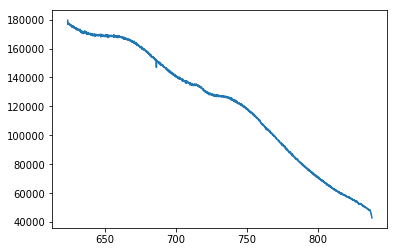

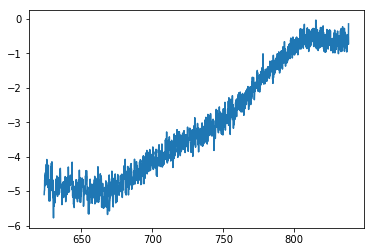

In [47]:
#plot the gain and offset
plt.plot(wavelengths[:-1],gain);
plt.figure()
plt.plot(wavelengths[:-1],offset);

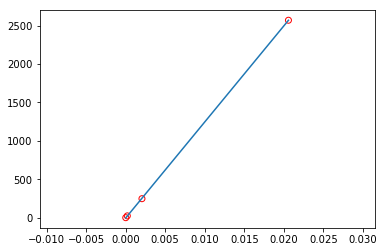

In [48]:
# plot one band for example (band 1000)
plt.scatter(sphere.iloc[1000,1:],cr_all[1000], facecolors='none', edgecolors='r')
slope, intercept, r_value, p_value, std_err = linregress(sphere.iloc[1000,1:].values.astype(float),cr_all[1000])
x = sphere.iloc[1000,1:]
y = sphere.iloc[1000,1:]*slope +intercept
plt.plot(x,y,)


In [49]:
#create radiance files
radiance5 = cr_5[:-1]*gain+offset 
radiance100 = cr_100[:-1]*gain+offset 
radiance1000 = cr_1000[:-1]*gain+offset 
radiance10000 = cr_10000[:-1]*gain+offset 


Text(0.5,1,'radiance10000')

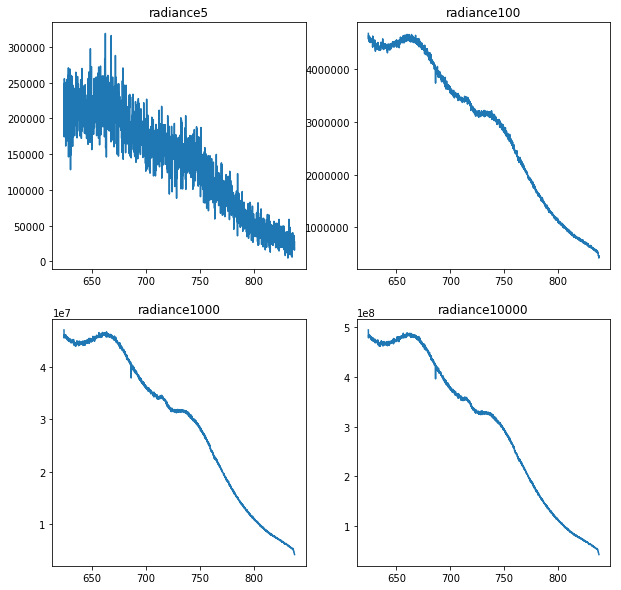

In [53]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].plot(wavelengths[:-1],radiance5)
axs[0, 0].set_title('radiance5')

axs[0,1].plot(wavelengths[:-1],radiance100)
axs[0,1].set_title('radiance100')

axs[1,0].plot(wavelengths[:-1],radiance1000)
axs[1,0].set_title('radiance1000')

axs[1,1].plot(wavelengths[:-1],radiance10000)
axs[1,1].set_title('radiance10000')


# Second assignment by Andy


In [54]:
#read the sphere uncertainties and interpolate to our wavelengths - than put it in a Pandas DF
new_values = np.interp(wavelengths,sphere_u.iloc[:,0],sphere_u.iloc[:,1])
sphere_u_new = pd.DataFrame(data= (np.hstack([np.vstack(wavelengths),np.vstack(new_values)])), columns = ['wavelengths', 'u'])

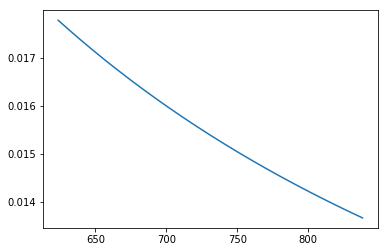

In [56]:
#plot the u
plt.plot(sphere_u_new['wavelengths'],sphere_u_new['u']);


In [57]:
#L realisation for 5fl
n=100
random_num = np.random.randn(n)
random_num = np.tile(np.matrix(random_num).T,2047)
error = sphere_u_new.iloc[:-1,1] * sphere.iloc[:,1]
error_mat = np.tile(error[:-1],(n,1)) 
error_mat = np.asarray(np.multiply(error_mat,random_num))
re5 = np.tile(sphere.iloc[:,1].values,(n,1)) +error_mat[:,:]

#L realisation for 100fl

random_num = np.random.randn(n)
random_num = np.tile(np.matrix(random_num).T,2047)
error = sphere_u_new.iloc[:-1,1] * sphere.iloc[:,2]
error_mat = np.tile(error[:-1],(n,1)) 
error_mat = np.asarray(np.multiply(error_mat,random_num))
re100 = np.tile(sphere.iloc[:,2].values,(n,1)) +error_mat[:,:]

#L realisation for 1000fl

random_num = np.random.randn(n)
random_num = np.tile(np.matrix(random_num).T,2047)
error = sphere_u_new.iloc[:-1,1] * sphere.iloc[:,3]
error_mat = np.tile(error[:-1],(n,1)) 
error_mat = np.asarray(np.multiply(error_mat,random_num))
re1000 = np.tile(sphere.iloc[:,3].values,(n,1)) +error_mat[:,:]

#L realisation for 10000fl

random_num = np.random.randn(n)
random_num = np.tile(np.matrix(random_num).T,2047)
error = sphere_u_new.iloc[:-1,1] * sphere.iloc[:,4]
error_mat = np.tile(error[:-1],(n,1)) 
error_mat = np.asarray(np.multiply(error_mat,random_num))
re10000 = np.tile(sphere.iloc[:,4].values,(n,1)) +error_mat[:,:]





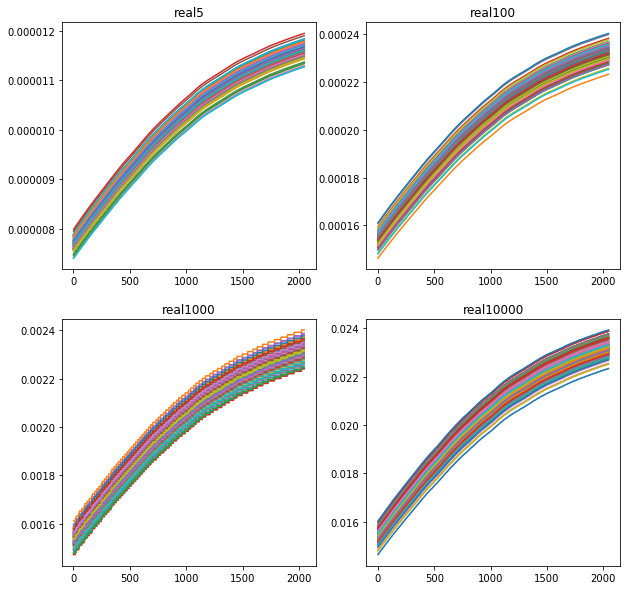

In [61]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0,0].plot(re5.T);
axs[0,0].set_title('real5')

axs[0,1].plot(re100.T);
axs[0,1].set_title('real100')

axs[1,0].plot(re1000.T);
axs[1,0].set_title('real1000')

axs[1,1,].plot(re10000.T);
axs[1,1].set_title('real10000');

In [63]:
# DN realisations - corrected std
u5 = ((data5.iloc[4:,1:] - dark_mean[:,None])/ 15.0).std(axis=1) / data5.shape[1]**0.5
u100 = ((data100.iloc[4:,1:]- dark_mean[:,None])/ 15).std(axis=1) / data100.shape[1]**0.5
u1000 = ((data1000.iloc[4:,1:]- dark_mean[:,None])/ 15).std(axis=1) / data1000.shape[1]**0.5
u10000 = ((data10000.iloc[4:,1:]- dark_mean[:,None])/ 15).std(axis=1) / data10000.shape[1]**0.5

In [65]:
#u+randn * DNs
# DN realisation for 5fl
n=100
random_num = np.random.normal(0,1,2047)
random_num = np.tile(random_num,(n,1))
DN_error_mat = random_num * u5[None,:]
DN_re5 = np.tile(cr_5,(n,1)) + DN_error_mat

# DN realisation for 100fl
random_num = np.random.normal(0,1,2047)
random_num = np.tile(random_num,(n,1))
DN_error_mat = random_num * u100[None,:]
DN_re100 = np.tile(cr_100,(n,1)) +DN_error_mat

# DN realisation for 1000fl
random_num = np.random.normal(0,1,2047)
random_num = np.tile(random_num,(n,1))
DN_error_mat = random_num * u1000[None,:]
DN_re1000 = np.tile(cr_1000,(n,1)) +DN_error_mat

# DN realisation for 10000fl
random_num = np.random.normal(0,1,2047)
random_num = np.tile(random_num,(n,1))
DN_error_mat =   u10000[None,:] *random_num
DN_re10000 = np.tile(cr_10000,(n,1)) + DN_error_mat

In [67]:
%%time
L_real = []
DN_real = []
for i in range(re5.shape[0]):
    L_real.append([re5[i,:],re100[i,:],re1000[i,:],re10000[i,:]])
    DN_real.append([DN_re5[i,:],DN_re100[i,:],DN_re1000[i,:],DN_re1000[i,:]])
L_real = np.array(L_real,dtype='float')
DN_real = np.array(DN_real,dtype='float')


gains = np.empty((L_real.shape[0],wavelengths.shape[0]), float)
offsets = np.empty((L_real.shape[0],wavelengths.shape[0]), float)

for i in range(L_real.shape[0]):
    for j in range(wavelengths.shape[0]-1):
        slope, intercept, r_value, p_value, std_err = linregress(L_real[i][:,j], DN_real[i][:,j])
        gains[i,j] = (slope)
        offsets[i,j] = (intercept)
    

Wall time: 28.2 s


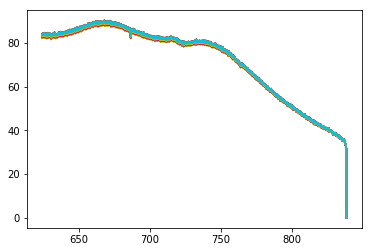

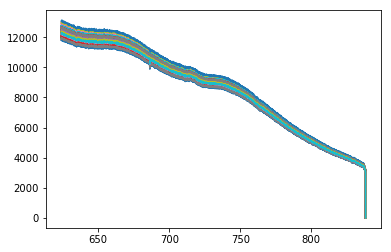

In [68]:
plt.plot(wavelengths,offsets.T);
plt.figure()
plt.plot(wavelengths,gains.T);

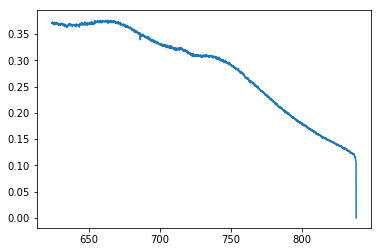

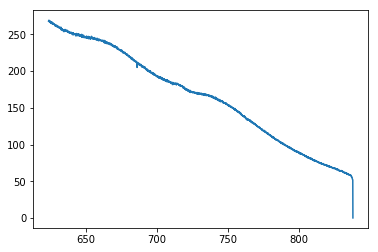

In [69]:
plt.plot(wavelengths,offsets.std(axis=0));
plt.figure()
plt.plot(wavelengths,gains.std(axis=0));